In [5]:
import numpy as np
import pandas as pd

# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Naive Bayes

### Iris Data Set

In [30]:
# Example borrowed heavily from : https://www.machinelearningplus.com/predictive-modeling/how-naive-bayes-algorithm-works-with-example-and-full-code/

iris = datasets.load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.3,random_state=123)

In [35]:
y_test.shape

(45,)

Text(89.18, 0.5, 'Predicted')

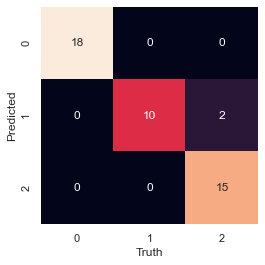

In [36]:
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(x_train, y_train)

# Predict Output 
pred = model.predict(x_test)

# Plot Confusion Matrix
mat = confusion_matrix(pred, y_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')


In [37]:
# Can we easily fix those ugly names? Yes. Here's one way. Can you find a better way?!

In [37]:
named_pred = [iris['target_names'][x] for x in pred]
named_true = [iris['target_names'][x] for x in y_test]

Text(89.18, 0.5, 'Predicted')

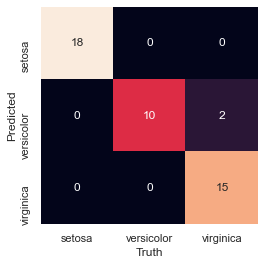

In [38]:
mat = confusion_matrix(named_pred, named_true)
names = np.unique(named_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')


### Bayesian Belief Networks

In [1]:
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController
import networkx as nx

ModuleNotFoundError: No module named 'pybbn'

In [8]:
a = BbnNode(Variable(0, 'a', ['on', 'off']), [0.5, 0.5])
b = BbnNode(Variable(1, 'b', ['on', 'off']), [0.5, 0.5, 0.4, 0.6])
c = BbnNode(Variable(2, 'c', ['on', 'off']), [0.7, 0.3, 0.2, 0.8])
d = BbnNode(Variable(3, 'd', ['on', 'off']), [0.9, 0.1, 0.5, 0.5])
e = BbnNode(Variable(4, 'e', ['on', 'off']), [0.3, 0.7, 0.6, 0.4])
f = BbnNode(Variable(5, 'f', ['on', 'off']), [0.01, 0.99, 0.01, 0.99, 0.01, 0.99, 0.99, 0.01])
g = BbnNode(Variable(6, 'g', ['on', 'off']), [0.8, 0.2, 0.1, 0.9])
h = BbnNode(Variable(7, 'h', ['on', 'off']), [0.05, 0.95, 0.95, 0.05, 0.95, 0.05, 0.95, 0.05])


bbn = Bbn() \
    .add_node(a) \
    .add_node(b) \
    .add_node(c) \
    .add_node(d) \
    .add_node(e) \
    .add_node(f) \
    .add_node(g) \
    .add_node(h) \
    .add_edge(Edge(a, b, EdgeType.DIRECTED)) \
    .add_edge(Edge(a, c, EdgeType.DIRECTED)) \
    .add_edge(Edge(b, d, EdgeType.DIRECTED)) \
    .add_edge(Edge(c, e, EdgeType.DIRECTED)) \
    .add_edge(Edge(d, f, EdgeType.DIRECTED)) \
    .add_edge(Edge(e, f, EdgeType.DIRECTED)) \
    .add_edge(Edge(c, g, EdgeType.DIRECTED)) \
    .add_edge(Edge(e, h, EdgeType.DIRECTED)) \
    .add_edge(Edge(g, h, EdgeType.DIRECTED))

# convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

# insert an observation evidence
ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('a')) \
    .with_evidence('on', 1.0) \
    .build()
join_tree.set_observation(ev)

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from pyvis import network as net


g, labels = bbn.to_nx_graph()

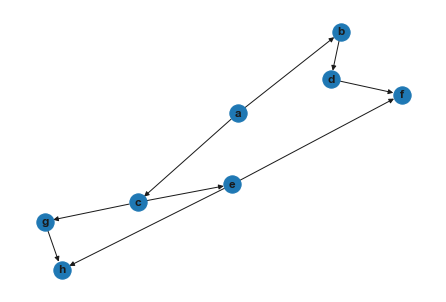

In [10]:
nx.draw(g, with_labels=True, labels = labels, font_weight='bold')

In [11]:
pvG = net.Network(notebook = True)
pvG.from_nx(g)

for key, value in labels.items():
    pvG.nodes[key]['label'] = value
pvG.show("example.html")

In [12]:
for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print('--------------')
    print(node)
    print('--------------')
    print(potential)
    print('--------------')

--------------
3|d|on,off
--------------
3=on|0.70000
3=off|0.30000
--------------
--------------
4|e|on,off
--------------
4=on|0.39000
4=off|0.61000
--------------
--------------
5|f|on,off
--------------
5=on|0.18934
5=off|0.81066
--------------
--------------
6|g|on,off
--------------
6=on|0.59000
6=off|0.41000
--------------
--------------
7|h|on,off
--------------
7=on|0.78260
7=off|0.21740
--------------
--------------
2|c|on,off
--------------
2=on|0.70000
2=off|0.30000
--------------
--------------
1|b|on,off
--------------
1=on|0.50000
1=off|0.50000
--------------
--------------
0|a|on,off
--------------
0=on|1.00000
0=off|0.00000
--------------
